# Skyscraper Index and Recession 

# Data Bootcamp Final Report

## Zhenyu Chen (zc676) & Yue Zheng (yz3152)
5/5/2017

In [1]:
%matplotlib inline                     

import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import xlwt                            # package to create a new excel
import seaborn as sns                  # package for better graph look
import statsmodels.api as sm           # package for statical analysis 
import statsmodels.formula.api as smf  # package for statical analysis that specifying formula
from patsy import dmatrices            # package for transforming matrix

## 1. Project Overview 

### 1.1 Background and justification of the project
Humans are ambitious of getting closer to the sky, so breaking the record of “the tallest
skyscraper” seems to be a heated competition worldwide. For now, the winner goes to Burj
Khalifa, a megatall skyscraper in Dubai.
A whimsical concept called the **“skyscraper index”** proposed by Andrew Lawrence in 1999 has
caught the attention of economists. According to Lawrence, “Business cycles and skyscraper
construction correlate in such a way that investment in skyscrapers peaks when cyclical growth
is exhausted and the economy is ready for recession”. For this project, we are interested in
exploring the correlation between skyscraper construction and recession.
Taking a step further to fulfill Lawrence’s idea, the Barclay Capital actually calculate their own skyscraper index and use it as an index for real estate and microeconomics analysis. 

Given that the Barclay Skyscraper Index is unreleased, we decide to organize the database of skyscraper index by ourselves, with information obtained from www.skyscraper.com and Penn World Table. By exploring the topics discussed in the following section, we want to find out answer for the big question: whether the skyscraper index is a good indicator for recession?....

### 1.2 Objectives and Methods of the project
The skyscrapercenter.com website contains useful information about the skyscrapers in the
world, including building name, city and its country code, height, completed year, etc. We transfrom data in the website to excel since the dataset is in manageable size (Scrapping doesn't work out nicely in our case). At the same time, countries’ macro statistical numbers are easy to get (GDP, inflation, etc.). 

As introduced above, we would like to find out the correlations between the skyscraper data and macroeconomics data by graphing and doing data analysis. **For better presentation purpose, we mainly focus on country Japan. ** It is known that Japan had a recession period starting 1980s. Also, its record of skyscraper construction is complete and eaily to obtain. We assume that such strong recession in Japan will give more explanatory power to the “skyscraper theorem” if it holds. Of course, using our data, we can easily analyze other countires by changing the country code.

### 1.3  Expected results of the project
We expect to see that the “skyscraper theorem” will hold during the recession period. Countries that built more skyscrapers may have more severe period of recession.

By running through detailed topics, we expect to see that the skyscraper index has correlation
with recession. However, whether the correlation implies strong predicting power for future
recession needs further research.

# 2. Clean Data
### 2.1 Clean the Skyscrapers Data
The skyscrapers data comes from [Skyscraper Center](http://www.skyscrapercenter.com/). The website is written in JavaScript so that we cannot use the method we learned in class to scrap the data. We still tried to scrap it but we failed to do so. However, the website allows us to download the data in pdf format. We then manually copy and paste the data into the excel. The data is well tabulated so the process is actually not complicated.

In [2]:
data_clean = 'C:\\Users\\lenovo\\Documents\\Data_Bootcamp\\Project\\data_clean.xlsx'

In [3]:
df1 = pd.read_excel(data_clean)
df1.head()

,Building Name,City,Country,Height,Floors,Completed,Material,Use
0,Tokyo Sky Tree,Tokyo,Japan,634,-,2012,steel,telecommunications / observation
1,Tokyo Tower,Tokyo,Japan,333,-,1958,steel,telecommunications / observation
2,Abeno Harukas,Osaka,Japan,300,60,2014,steel,hotel / office / retail
3,Landmark Tower,Yokohama,Japan,296,73,1993,steel,hotel / office
4,Rinku Gate Tower,Izumisano,Japan,256,56,1996,concrete/steel,hotel / office


We want to know for each country, how many Skyscrapers were built in each year. We found a package called 'xlwt' which help us create a new excel file and clean the data more efficiently. By saving our output into a new excel, we do not need to re-run the code every time we open the jupyter notebook. 

In [4]:
sheet_range = list(range(0, 5))           # There are 5 sheets in the file, and we convert the range into a list for future use.
year_range = list(range(1909, 2018))      # The earliest skyscrapers data was built in 1909 in New York according to our data.

In [5]:
# Create a new excel to record the counts, using the xlwt package.
file = xlwt.Workbook() 
table = file.add_sheet('sheet_1', cell_overwrite_ok=True)

# "cell_overwrite_ok=True" allows Python to overwrite the cells. In our practice we found it useful to prevent errors.

# Set the column names for the new excel, using the function table.write(row, column, text).
table.write(0, 0, 'Country')
table.write(0, 1, 'Year')
table.write(0, 2, 'Count')

The skyscrapers data excel have 5 sheets, and each of them contains the skyscrapers data for a specific contury (Japan, Singarpore, China, US and UAE). The idea is that, we first go through all the 5 sheets, and within a sheet, we count the number of skyscrapers built in each year. By using the "groupby" function and boolean selection we could also achieve this. However, when we wrote those codes, those concepts were not introduced, so we used two loops to get the same result. The method works great so we decide to keep those codes. As we mentioned, we will focus on the Japanese data in this project, but we clean the data for all 5 countries in case of future use.

In [6]:
row = 1
for sheetnumber in sheet_range:
    df1 = pd.read_excel(data_clean, sheetname=sheetnumber) # Read a sheet, from the first one to the fifth.
    country = df1.iat[1, 2]                                # Get the country name by reading the specific value in cell (2, 3).
    for year in year_range:
        Years = [year]
        year_data = df1[df1['Completed'].isin(Years)] # Group all the skyscrapers that were built in the same year.
        count = len(year_data.index)                  # Count how many skyscrapers were built in each year group, using the length of the index.
        print(country, year, count)                   # To show the result and check if the results are correct.
        table.write(row, 0, country)                  # Record the county, year and count data in the new excel we created.
        table.write(row, 1, year)
        table.write(row, 2, count)
        row += 1
    file.save('year_count_data.xls')                  
    # Save the file. Next time we can directly use the data from this excel without re-running all the code again.

Japan 1909 0
Japan 1910 0
Japan 1911 0
Japan 1912 0
Japan 1913 0
Japan 1914 0
Japan 1915 0
Japan 1916 0
Japan 1917 0
Japan 1918 0
Japan 1919 0
Japan 1920 0
Japan 1921 0
Japan 1922 0
Japan 1923 0
Japan 1924 0
Japan 1925 0
Japan 1926 0
Japan 1927 0
Japan 1928 0
Japan 1929 0
Japan 1930 0
Japan 1931 0
Japan 1932 0
Japan 1933 0
Japan 1934 0
Japan 1935 0
Japan 1936 0
Japan 1937 0
Japan 1938 0
Japan 1939 0
Japan 1940 0
Japan 1941 0
Japan 1942 0
Japan 1943 0
Japan 1944 0
Japan 1945 0
Japan 1946 0
Japan 1947 0
Japan 1948 0
Japan 1949 0
Japan 1950 0
Japan 1951 0
Japan 1952 0
Japan 1953 0
Japan 1954 1
Japan 1955 0
Japan 1956 0
Japan 1957 0
Japan 1958 1
Japan 1959 0
Japan 1960 0
Japan 1961 1
Japan 1962 0
Japan 1963 1
Japan 1964 1
Japan 1965 1
Japan 1966 0
Japan 1967 0
Japan 1968 1
Japan 1969 0
Japan 1970 2
Japan 1971 2
Japan 1972 0
Japan 1973 0
Japan 1974 6
Japan 1975 1
Japan 1976 2
Japan 1977 1
Japan 1978 2
Japan 1979 1
Japan 1980 5
Japan 1981 0
Japan 1982 1
Japan 1983 3
Japan 1984 2
Japan 1985 0

### 2.2 Clean the PWT90 Data

The GDP data comes from Penn World Table. Here we clean the data for Japan as an example. For other countries, it is easy to repeat the same process by changing the country code.

In [7]:
url = "http://www.rug.nl/ggdc/docs/pwt90.xlsx"    # The url link from PWT
pwt = pd.read_excel(url, sheetname='Data',        # Use data from the sheet named 'Data'
                   parse_cols=[0,1,2,3,4])        # Extarct the 1-5 collums of the data

In [8]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe
0,ABW,Aruba,Aruban Guilder,1950,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN


So now we hava a data that contans information of countrycode, country name, curreny_unit, year and real GDP.

In [9]:
pwt1=pwt.loc[pwt['countrycode'] == ('JPN')]         # Extract data of Japan by using boolean
pwt2=pwt1.loc[pwt1['year'].isin(range(1970,2017))]  # Change the year range, from 1970 to 2016
pwt2.head()

,countrycode,country,currency_unit,year,rgdpe
5610,JPN,Japan,Yen,1970,1343607.75
5611,JPN,Japan,Yen,1971,1430099.75
5612,JPN,Japan,Yen,1972,1562533.00
5613,JPN,Japan,Yen,1973,1687001.75
5614,JPN,Japan,Yen,1974,1640737.00


We further extract information of Japan by setting boolean statement, and set year to range from 1970 to 1974. The number of skyscrapers built in each year is an annual change, so it makes more sense to compare it with the annual change of GDP, which is the GDP growth rate. See section 2.3，2.4 for calculation of GDP growth rate and combinaiton of data.

### 2.3 Combine the Two Data Set

Again, we use Japan as an example to combine the skyscrapers data and the GDP data into one data set.

In [10]:
year_count_data = 'C:\\Users\\lenovo\\Documents\\Data_Bootcamp\\Project\\year_count_data.xls'
df2 = pd.read_excel(year_count_data)
df2.head()

,Country,Year,Count
0,Japan,1909,0
1,Japan,1910,0
2,Japan,1911,0
3,Japan,1912,0
4,Japan,1913,0


In [11]:
df_JPN = df2[df2['Country']=='Japan']
combo_1 = df_JPN.merge(pwt2, how='left', left_on='Year', right_on='year')
combo_1 = combo_1.rename(columns={'rgdpe':'GDP'})
combo_1.tail()

,Country,Year,Count,countrycode,country,currency_unit,year,GDP
104,Japan,2013,14,JPN,Japan,Yen,2013.0,4497593.5
105,Japan,2014,12,JPN,Japan,Yen,2014.0,4483260.5
106,Japan,2015,15,NaN,NaN,NaN,NaN,NaN
107,Japan,2016,14,NaN,NaN,NaN,NaN,NaN
108,Japan,2017,1,NaN,NaN,NaN,NaN,NaN


In [12]:
combo_JPN = combo_1[['Country', 'Year', 'Count', 'GDP', 'currency_unit']]
combo_JPN.tail()

,Country,Year,Count,GDP,currency_unit
104,Japan,2013,14,4497593.5,Yen
105,Japan,2014,12,4483260.5,Yen
106,Japan,2015,15,NaN,NaN
107,Japan,2016,14,NaN,NaN
108,Japan,2017,1,NaN,NaN


There is an error saying that "A value is trying to be set on a copy of a slice from a DataFrame" and there is a better way to do it. However, the current method works well. So far we get the clean data we need to continue our project. 

### 2.4 Calculate GDP Growth from PWT90

Since we have the cleaned PWT90 data, we can calculate GDP growth by dividing a year's GDP by the previous year's GDP and minus 1. The loop gives us a list. We have to convert it into a series in order to concat it with dataframes.

In [13]:
i = 0
GDP_growth = []

for i in range(0, 109):
    if i == 0:
        c = 0  # set 0 as our first year's GDP growth since we do not have previous year's information. We are not likely to use the first year's GDP growth anyways.
        GDP_growth.append(c)
    else:
        a = combo_JPN.loc[i-1, 'GDP']
        b = combo_JPN.loc[i, 'GDP']
        c = b/a-1
        GDP_growth.append(c)
        i += 1
    
GDP_growth = pd.Series(GDP_growth)

In [14]:
GDP_growth.tail()

104    0.010385
105   -0.003187
106         NaN
107         NaN
108         NaN
dtype: float64

Combine the GDP_growth series and the combo_JPN dataframe together.

In [15]:
combo_JPN = pd.concat([combo_JPN, GDP_growth], axis=1, join_axes=[combo_JPN.index])

In [16]:
combo_JPN = combo_JPN.rename(columns={0: 'GDP_growth'})
combo_JPN = combo_JPN.set_index('Year')
combo_JPN.tail()

,Country,Count,GDP,currency_unit,GDP_growth
Year,,,,,
2013,Japan,14,4497593.5,Yen,0.010385
2014,Japan,12,4483260.5,Yen,-0.003187
2015,Japan,15,NaN,NaN,NaN
2016,Japan,14,NaN,NaN,NaN
2017,Japan,1,NaN,NaN,NaN


### 2.5 Clean the GDP and Inflation Data

In order to better understand the information about recession, we obtain data from IMF,specifically its [World Economic Outlook database](https://www.imf.org/external/ns/cs.aspx?id=28). By using selective variables related to GDP and inflation rates, we extract information within certain countries that are reasonable for our purpose of doing analysis.

In [17]:
url = 'https://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls' ###weo link

In [18]:
weo = pd.read_csv(url, sep='\t',                          # read csv document fron url
                  usecols = [1, 2] + list(range(19,46)),  # use the 2nd, 3rd and 20-47 columns
                  thousands=',',                          # change thousands
                  na_values=['n/a', '--'])                # change NA values

Now we obtain the dataFrame called weo. It contains information from different countries from Year 1990 to Year 2011. This year range is sufficient for now considered our puropose of doing simple recession analysis. To continue, we extraxt specific vairiables and countires that we are looking for.

In [19]:
variables1 = ['NGDPRPC','NGDPD','PCPIPCH','PCPIE']  # Define a list of variables1
df = weo[weo['WEO Subject Code'].isin(variables1)]  # Find variables1 in this column
variables2 = ['JPN','USA','CHN','ARE','SGP']        # Define a list of variables12
df = weo[weo['ISO'].isin(variables2)]               # Find variables2 in this column
df = df[0:-5]                                       # Extract only Data without additional info

pv2 = pd.pivot_table(df,index=['WEO Subject Code','ISO'], dropna=False, fill_value=0.0)
                                                    # reindex teh table to a pivot view
pv2.columns= np.arange(1990,2017)                   # set year range

import seaborn as sns                               # import seaborn package
palette = sns.color_palette("Paired", 10)           # set palette style
sns.set_palette(palette)

pv2.loc['NGDPRPC', 'JPN']                            # Test data by get GDP from Japan

1990    3438915.262
1991    3539187.399
1992    3555591.144
1993    3550176.546
1994    3570915.868
1995    3630991.041
1996    3717614.850
1997    3767948.941
1998    3682600.793
1999    3668341.141
2000    3743926.580
2001    3748339.132
2002    3751283.749
2003    3807502.026
2004    3894336.491
2005    3944525.330
2006    4011483.703
2007    4099063.786
2008    4058433.944
2009    3838386.209
2010    4017848.494
2011    3992197.240
2012    4070635.644
2013    4132964.919
2014    4138742.679
2015    4165595.314
2016    4192686.527
Name: (NGDPRPC, JPN), dtype: float64

Now we have the data ready for inflation and GDP analysis, see the next section for graphs.

# 3. Data Analysis
### 3.1 Understanding Recession

Before we get in to the analysis of skycraper index and recession, we want to show that the time period and countries that we selected are valid for the purpose of illustration. For the purpose of simplicity, **we focus mainly on the country Japan, and the time frame 1990-2016**. We choose Japan as our main research target for two reaons. On the one hand, Japan goes through great recession period as Japan government tighted their monetary policy during 1985-1990, the market collapsed from then on, so the signs for recession should be clear. On the other hand, Japan have relativly sufficent record of construction of skycrapers. We choose other control countires such as United States, China, Singpapre and United Arab Emirates for comparison and illustration purpose (Extraction of countries shown in part 2.5). 

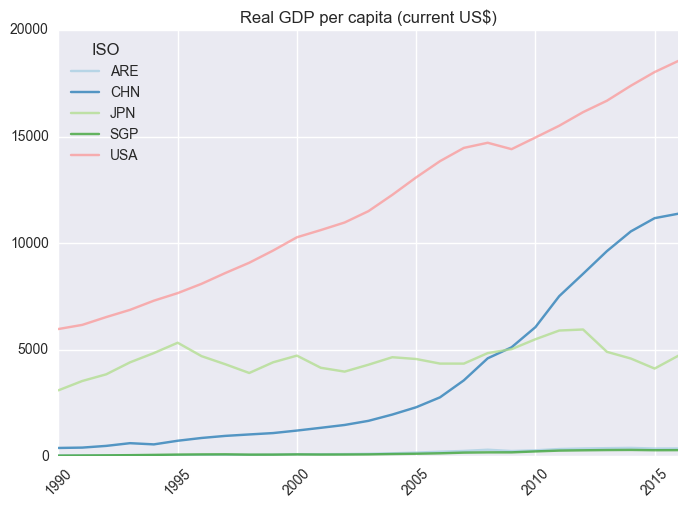

In [20]:
pv2.loc['NGDPD'].T.plot(alpha=0.75, rot=45, title="Real GDP per capita (current US$)")

This graph demonstrates real GDP per capita across different countires (scaled through US dollar). In this graph , it is clear that Japan (Labelld in Green)goes through decline in GDP starting around Year1995, while other countries in the same period had increasing GDP. The volatility of Japan GDP is also relatively large, implying that the economy of Japan was not stable over time.

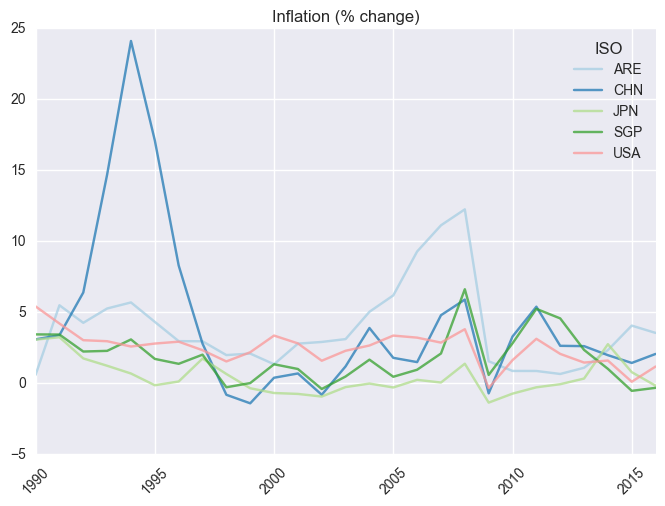

In [21]:
pv2.loc['PCPIPCH'].T.plot(alpha=0.75, rot=45, title="Inflation (% change)")

This graph demonstrates information about inflation.It can be seen that starting Year 1990, Japan had decreasing rate of change in CPI. Compared with other countries, it had a relatively long peiord of deflation, the inflation (negative) index is lower in value compared with other countries. Japan seems to be influenced by this recession shock and finds it hard to recover.

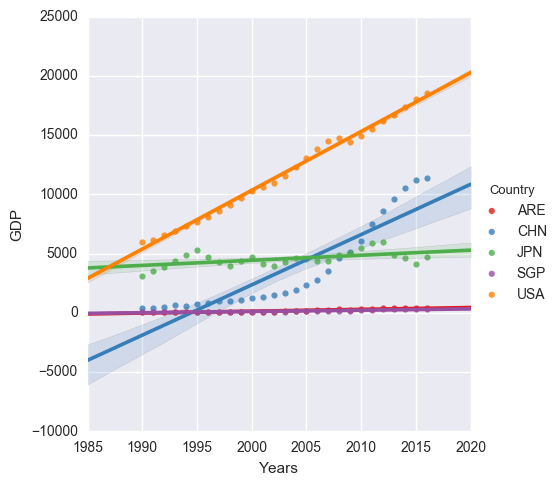

In [22]:
plot_data = pv2.loc['NGDPD'].T.reset_index()                          # focus on real GDP data
plot_data.rename(columns={'index':'Years'}, inplace=True)             # rename the index
melt_data = pd.melt(plot_data, id_vars=['Years'],var_name='Country')  # x value: Year
melt_data.rename(columns={'value':'GDP'}, inplace=True)               # y value: Country GDP
sns.lmplot(x="Years", y="GDP", hue="Country", data=melt_data, palette="Set1")

By running out a linear regression, we see that the regression line of Japan for GDP over years are relatively flat. After fluctuations around Year 1995, the downward trending GDP restrain economic growth of Japan, while other countires have faster increase.

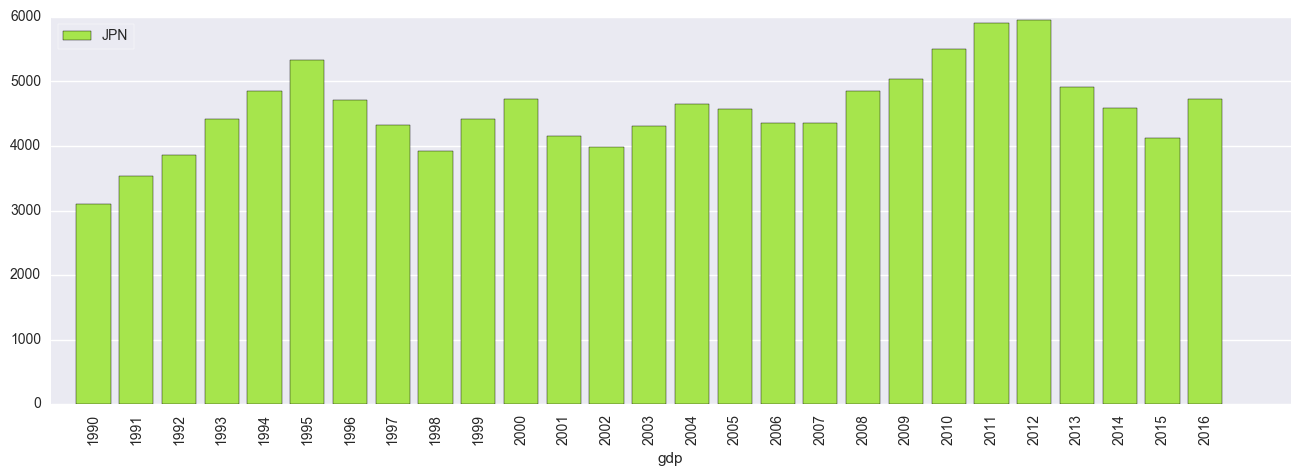

In [23]:
pv2T = pv2.T                                        # Transpose
f, ax = plt.subplots(figsize=(16, 5))               # Set fig size
sns.barplot(x='Years',y='JPN', data=plot_data,label="JPN", color=sns.xkcd_rgb["lime"])
ax.legend(ncol=2, loc="upper left", frameon=True)   # Set legend 
ax.set(xlim=(-1, 28), ylabel="",xlabel="gdp")       # Set label
plt.xticks(rotation=90)                             # rotate the year on x value for better look
sns.despine(left=True, bottom=True)                 # Adjust size
plt.show()

At last, we are plotting a histogram to show the real GDP of Japan from year 1990 to 2016. With a clearer distribution, we will go into details about whether Skycraper index relates to recession in the following section.

### 3.2 Skyscraper, GDP, and Recession

The data we use for 3.2 starts from 1980, which is the year before the recession happened.

In [24]:
combo_JPN_subset = combo_JPN[combo_JPN.index.isin(range(1980, 2015))]
combo_JPN_subset.head()

,Country,Count,GDP,currency_unit,GDP_growth
Year,,,,,
1980,Japan,5,2255564.75,Yen,0.026778
1981,Japan,0,2245812.25,Yen,-0.004324
1982,Japan,1,2208583.50,Yen,-0.016577
1983,Japan,3,2176807.25,Yen,-0.014388
1984,Japan,2,2193488.75,Yen,0.007663


We multiply GDP growth by 1000 and then divide GDP by a 100000, so that they can be shown in the same graph with skyscrapers counts. By observing the graph we can have a basic idea of the relationship between skyscrapers index and GDP.

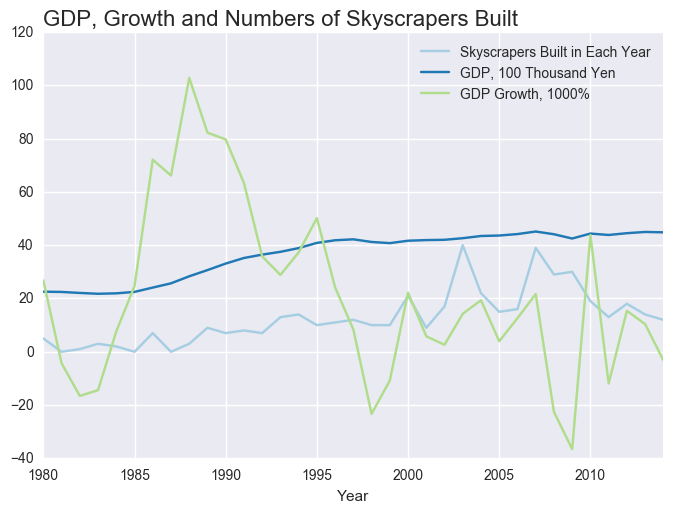

In [25]:
fix, ax = plt.subplots()

x1 = combo_JPN_subset['GDP']/100000
x2 = combo_JPN_subset['GDP_growth']*1000
 
combo_JPN_subset['Count'].plot(ax=ax, label='Skyscrapers Built in Each Year')
x1.plot(ax=ax, label='GDP, 100 Thousand Yen')
x2.plot(ax=ax, label='GDP Growth, 1000%')

ax.set_title('GDP, Growth and Numbers of Skyscrapers Built', fontsize=16, loc='left')
ax.legend(loc='best')

Given skyscraper count, GDP and GDP growth are measured in different units (1 for count, 100k for GDP and 1000% for growth), it is not reasonable to compare them on the value basis. From the graph we may still say there is some kind of correlation between skyscrapers index and GDP growth, because in some years, they move up and down together. For example, during 2000 and 2005, this correlation is very strong. However, this is our intuition thus we cannot make this argument without further quantitative analysis.

### 3.3 Correlation Analysis

Correlation analysis is the simplest model but it may offer us some useful information. If the “skyscraper theorem” holds, then there might be a negative correlation between skyscrapers count and GDP growth in the long run. The correlation is -0.27 using the data from 1980 to 2014. This negative correlation somehow meets our expectation. At the same time, however, the absolute value of which is not large, indicating that the correlation is not that strong.

In [26]:
combo_JPN_subset['Count'].corr(combo_JPN_subset['GDP_growth'])

-0.27172035424347474

We also notice that the correlation results are various when we split the data into several subsets. Here we split the data in to pre-crisis time (1980-1985), crisis time (1986-1991) and post-crisis time (1992-2014). We see there is a strong positive correlation during pre-crisis time. This may result from Japan's rapid economic growth before crisis. During the crisis time and post-crisis time, the correlations between skyscrapers count and GDP growth are weak. 

In [27]:
combo_JPN_subset_1 = combo_JPN[combo_JPN.index.isin(range(1980, 1985))]
combo_JPN_subset_1['Count'].corr(combo_JPN_subset_1['GDP_growth'])

0.66463090399002034

In [28]:
combo_JPN_subset_2 = combo_JPN[combo_JPN.index.isin(range(1986, 1991))]
combo_JPN_subset_2['Count'].corr(combo_JPN_subset_2['GDP_growth'])

0.076568300062661312

In [29]:
combo_JPN_subset_3 = combo_JPN[combo_JPN.index.isin(range(1992, 2014))]
combo_JPN_subset_3['Count'].corr(combo_JPN_subset_3['GDP_growth'])

-0.17537769220951219

The numbers make sense to us, but correlation cannot show the predictive power of skyscrapers index towards recession. Thus, further analysis is needed.

### 3.4 Regression Analysis

Since the correlation result does not seem to have much explanatory power, we now take a step further to do a simple regression. We want to conduct a linear regression model, setting the independent varialble (x) to be count, and the dependent variable (y) to be GDP growth. 

In [30]:
combo_JPN_subset1 = combo_JPN_subset [['Count','GDP_growth']] # Extract the two varaibles we need
combo_JPN_subset1.tail()

,Count,GDP_growth
Year,,
2010,19,0.043792
2011,13,-0.011910
2012,18,0.015380
2013,14,0.010385
2014,12,-0.003187


In [31]:
# Now tarnsform the variables into matrix for clearer presentation
y,X = dmatrices('GDP_growth~Count', data=combo_JPN_subset1, return_type = 'dataframe')
print (y.head())   # printting y variable to be GDP_growth
print (X.head())   # printting X variable to be Count

      GDP_growth
Year            
1980    0.026778
1981   -0.004324
1982   -0.016577
1983   -0.014388
1984    0.007663
      Intercept  Count
Year                  
1980        1.0    5.0
1981        1.0    0.0
1982        1.0    1.0
1983        1.0    3.0
1984        1.0    2.0


In [32]:
mod = sm.OLS(y,X)         # choosing to run OLS estimation
res = mod.fit()           # setting the residual value
print (res.summary())     # print out the OLS result

                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.631
Date:                Fri, 05 May 2017   Prob (F-statistic):              0.114
Time:                        22:31:47   Log-Likelihood:                 71.628
No. Observations:                  35   AIC:                            -139.3
Df Residuals:                      33   BIC:                            -136.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0325      0.009      3.658      0.0

This regression result gives us more insight about our hypothesis. First of all, the independent variable (count) has negative coefficient, and this is significant in the 95% Confidence Level. That is to say, the skyscraper index is indeed negatively related to to GDP growth In Japan from Year 1980 to year 2014. However, the R-Square and adjusted R-square is extremely low, this makes sense since we only  regress on one dependent variable, while there are many other factors influencing the change in GDP growth. Another thing that we notice is the Durbin_Watson result. The value 0.832 is between (0,2), indicating that there is a positive auto correlation. That is to say, there is probably a time lag in the count seires data. Also, it can be assumed that when economy is generally good, more buildings are built within these years, while recession might lead to decrease in constructions of skyscrapers in following years.  

# 4. Conclusion

1. In our specific example of Japan, we can draw a conclusion that skyscrapers index can be used as an indicator of GDP growth. Therefore, it is a good indicator for recession since recession is tightly connnected to GDP growth. However, it is inappropriate to use it as the only indicator. The reasons are given in 3.4.
2. For better presentation purpose, we are not showing the analysis for the other 4 countries here because it only requires us to change the country name and code based on our current code. However, we find that in some other countries, for example in China, the coefficient for skyscrapers count in the regression is actually positive: skyscrapers count and GDP growth move in the same direction.  So, the skyscrapers index does not have predicting power in those conutries. We come up with two possible explanations for China. The first explanation is China has never suffered from a "real" recession even in 2008. The economic growth allows the country to build more and more skyscrapers. If it is true, we can add China into a validation set to check if the huge number of skyscrapers built will lead to China's future recession. The second explanation is the country has a tradition of "showing off". People build skyscrapers even in bad years. If it is ture, we may confirm skyscrapers index is not a good indicator of recession for China and similar countries.
3. To figure out the features for countries in which the skyscrapers index has a strong predictive power for recession is a topic worth further researching. The further research requires more countries' data in more dimensions. Principal component analysis, cluster analysis and some machine learning models would help.